In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sb

# Loading & Cleaning Data

In [2]:
bike_data = pd.read_csv('BIKE DETAILS.csv')

In [3]:
bike_data

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price  
0     1st owner        350                NaN  
1     1st owner       5650                NaN  
2     1st owner      12000           148114.0  
3     1st owner      23000            89643.0  
4     2nd owner      21000                NaN  
...         ...        ...                ...  
1056  1st owner     500000            52000.0  
1057  1st owner      33000            51000.0  
1058  2nd owner      35000            57000.0  
1059  1st owner      53000            58000.0  
1060  1st owner      92233            75000.0  

[1061 rows x 7 columns]

In [ ]:
#Information like seller_type, owner, ex_showroom_price seem too specific to include in our regression

In [4]:
bike_data['brand'] = bike_data.apply(lambda row: row['name'].split()[0], axis =1)

In [5]:
bike_data

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price   brand  
0     1st owner        350                NaN   Royal  
1     1st owner       5650                NaN   Honda  
2     1st owner      12000           148114.0   Royal  
3     1st owner      23000            89643.0  Yamaha  
4     2nd owner      21000                NaN  Yamaha  
...         ...        ...                ...     ...  
1056  1st owner     500000            52000.0  Activa  
1057  1st owner      33000            51000.0   Honda  
1058  2nd owner      35000            57000.0   Bajaj  
1059  1st owner      53000            58000.0   Honda  
1060  1st owner      92233            75000.0   Bajaj  

[1061 rows x 8 columns]

In [6]:
set(bike_data['brand'])

{'Activa',
 'Aprilia',
 'BMW',
 'Bajaj',
 'Benelli',
 'Harley-Davidson',
 'Hero',
 'Honda',
 'Hyosung',
 'Jawa',
 'KTM',
 'Kawasaki',
 'Mahindra',
 'Royal',
 'Suzuki',
 'TVS',
 'UM',
 'Vespa',
 'Yamaha',
 'Yo'}

In [ ]:
#Activa Motorcycles are part of the Honda brand

#There is no brand called Royal

In [7]:
list(bike_data.loc[bike_data.brand == 'Royal'].name)

['Royal Enfield Classic 350',
 'Royal Enfield Classic Gunmetal Grey',
 'Royal Enfield Bullet 350 [2007-2011]',
 'Royal Enfield Classic Gunmetal Grey',
 'Royal Enfield Thunderbird 350',
 'Royal Enfield Thunderbird 350',
 'Royal Enfield Electra 5 S',
 'Royal Enfield Bullet 350',
 'Royal Enfield Thunderbird 350',
 'Royal Enfield Electra 4 S',
 'Royal Enfield Thunderbird 350X',
 'Royal Enfield Thunderbird 350X',
 'Royal Enfield Classic Gunmetal Grey',
 'Royal Enfield Thunderbird 350X',
 'Royal Enfield Classic 350',
 'Royal Enfield Classic Desert Storm',
 'Royal Enfield Thunderbird 350',
 'Royal Enfield Classic Gunmetal Grey',
 'Royal Enfield Classic 350',
 'Royal Enfield Continental GT 650',
 'Royal Enfield Classic Gunmetal Grey',
 'Royal Enfield Classic 350',
 'Royal Enfield Classic 500',
 'Royal Enfield Thunderbird 350X',
 'Royal Enfield Thunderbird 350',
 'Royal Enfield Bullet 350',
 'Royal Enfield Classic Desert Storm',
 'Royal Enfield Classic 350',
 'Royal Enfield Classic 350',
 'Roya

In [ ]:
#Royal Enfield is a brand

In [6]:
bike_data.loc[bike_data.brand == 'Royal', 'brand'] = 'Royal Enfield'


bike_data.loc[bike_data.brand == 'Activa', 'brand'] = 'Honda'


In [7]:
bike_data

name  selling_price  year seller_type  \
0               Royal Enfield Classic 350         175000  2019  Individual   
1                               Honda Dio          45000  2017  Individual   
2     Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3       Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                   Yamaha SZ [2013-2014]          20000  2011  Individual   
...                                   ...            ...   ...         ...   
1056                            Activa 3g          17000  2010  Individual   
1057                     Honda CB twister          16000  2012  Individual   
1058                   Bajaj Discover 125          15000  2013  Individual   
1059                       Honda CB Shine          12000  2009  Individual   
1060                     Bajaj Pulsar 150          10000  2008  Individual   

          owner  km_driven  ex_showroom_price          brand  
0     1st owner        350                NaN  Royal Enfield  
1     1st owner       5650                NaN          Honda  
2     1st owner      12000           148114.0  Royal Enfield  
3     1st owner      23000            89643.0         Yamaha  
4     2nd owner      21000                NaN         Yamaha  
...         ...        ...                ...            ...  
1056  1st owner     500000            52000.0          Honda  
1057  1st owner      33000            51000.0          Honda  
1058  2nd owner      35000            57000.0          Bajaj  
1059  1st owner      53000            58000.0          Honda  
1060  1st owner      92233            75000.0          Bajaj  

[1061 rows x 8 columns]

# Analyzing Data & Preprocessing

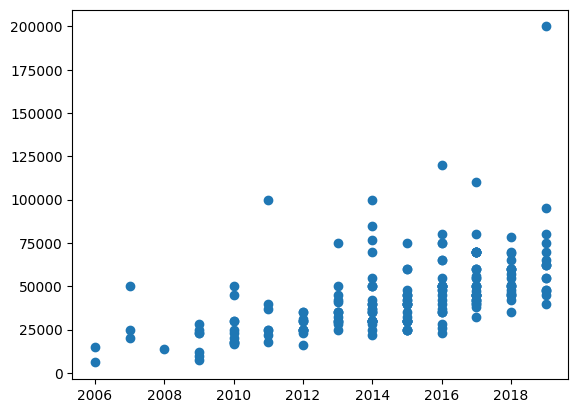

In [8]:
selected_df = bike_data[bike_data.brand == 'Honda']
x = selected_df['year']
y1 = selected_df['selling_price']

plot = plt.scatter(x,y1)

plt.show()

In [ ]:
#Data is non-linear and small 


#Kernel regression should be used

In [11]:
sorted(set(bike_data['brand']))

['Aprilia',
 'BMW',
 'Bajaj',
 'Benelli',
 'Harley-Davidson',
 'Hero',
 'Honda',
 'Hyosung',
 'Jawa',
 'KTM',
 'Kawasaki',
 'Mahindra',
 'Royal Enfield',
 'Suzuki',
 'TVS',
 'UM',
 'Vespa',
 'Yamaha',
 'Yo']

In [ ]:
#we have arbitrarily selected Aprilia as the base case

In [9]:
relevant_data = bike_data[['year', 'selling_price', 'brand']]

In [10]:
brands = sorted(set(relevant_data['brand']))[1:]

In [11]:
def check_same(v1, v2):
    if v1 == v2:
        return 1
    return 0

In [12]:
#Create binary variables for each brand. Assigning 1 for the brand and 0 for everything else
for x in brands:
    relevant_data[x] = relevant_data.apply(lambda row: check_same(row.brand, x), axis = 1)

C:\Users\Anakin\AppData\Local\Temp\ipykernel_8740\894792926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data[x] = relevant_data.apply(lambda row: check_same(row.brand, x), axis = 1)
C:\Users\Anakin\AppData\Local\Temp\ipykernel_8740\894792926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_data[x] = relevant_data.apply(lambda row: check_same(row.brand, x), axis = 1)
C:\Users\Anakin\AppData\Local\Temp\ipykernel_8740\894792926.py:3: SettingWithCopyWarning: 
A value is trying to be

In [13]:
relevant_data

year  selling_price          brand  BMW  Bajaj  Benelli  \
0     2019         175000  Royal Enfield    0      0        0   
1     2017          45000          Honda    0      0        0   
2     2018         150000  Royal Enfield    0      0        0   
3     2015          65000         Yamaha    0      0        0   
4     2011          20000         Yamaha    0      0        0   
...    ...            ...            ...  ...    ...      ...   
1056  2010          17000          Honda    0      0        0   
1057  2012          16000          Honda    0      0        0   
1058  2013          15000          Bajaj    0      1        0   
1059  2009          12000          Honda    0      0        0   
1060  2008          10000          Bajaj    0      1        0   

      Harley-Davidson  Hero  Honda  Hyosung  ...  KTM  Kawasaki  Mahindra  \
0                   0     0      0        0  ...    0         0         0   
1                   0     0      1        0  ...    0         0         0   
2                   0     0      0        0  ...    0         0         0   
3                   0     0      0        0  ...    0         0         0   
4                   0     0      0        0  ...    0         0         0   
...               ...   ...    ...      ...  ...  ...       ...       ...   
1056                0     0      1        0  ...    0         0         0   
1057                0     0      1        0  ...    0         0         0   
1058                0     0      0        0  ...    0         0         0   
1059                0     0      1        0  ...    0         0         0   
1060                0     0      0        0  ...    0         0         0   

      Royal Enfield  Suzuki  TVS  UM  Vespa  Yamaha  Yo  
0                 1       0    0   0      0       0   0  
1                 0       0    0   0      0       0   0  
2                 1       0    0   0      0       0   0  
3                 0       0    0   0      0       1   0  
4                 0       0    0   0      0       1   0  
...             ...     ...  ...  ..    ...     ...  ..  
1056              0       0    0   0      0       0   0  
1057              0       0    0   0      0       0   0  
1058              0       0    0   0      0       0   0  
1059              0       0    0   0      0       0   0  
1060              0       0    0   0      0       0   0  

[1061 rows x 21 columns]

# Support Vector Regression

In [32]:
variable_fields = [x for x in relevant_data.columns if x  not in ('selling_price', 'brand')]
variables = relevant_data[variable_fields]
price = relevant_data['selling_price']
X_train,X_test, y_train, y_test = train_test_split(variables, price, test_size = 0.2, random_state = 100)

In [33]:
from sklearn.svm import SVR

svr = SVR(kernel = 'poly', degree = 5)
svr.fit(X_train, y_train)

SVR(degree=5, kernel='poly')

In [34]:
y_test_pred = svr.predict(X_test)

y_train_pred = svr.predict(X_train)

In [35]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", svr.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
print("\nGoodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", svr.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: -0.07472128176513881
Mean Squared Error (MSE) 	: 3179762018.792012

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: -0.047109061793990215
Mean Squared Error (MSE) 	: 4184475171.77417


In [86]:
svr.score(X_train, y_train)

-0.07472166203407227

# Kernel Ridge Regression

In [21]:
variable_fields = [x for x in relevant_data.columns if x  not in ('selling_price', 'brand')]
variables = relevant_data[variable_fields]
price = relevant_data['selling_price']
X_train,X_test, y_train, y_test = train_test_split(variables, price, test_size = 0.2, random_state = 100)

In [22]:
from sklearn.kernel_ridge import KernelRidge

krr = KernelRidge(kernel='polynomial',degree= 4)
krr.fit(X_train, y_train)

C:\Users\Anakin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


KernelRidge(degree=4, kernel='polynomial')

In [16]:
y_test_pred = krr.predict(X_test)

y_train_pred = krr.predict(X_train)

In [18]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model\n")

print("Train Dataset")
print("Coefficient of Determination(R^2):\t", krr.score(X_train, y_train))
print("Mean Squared Error (MSE): \t\t", mean_squared_error(y_train, y_train_pred))

# Check the Goodness of Fit (on Test Data)
print("\nTest Dataset")
print("Coefficient of Determination(R^2):\t", krr.score(X_test, y_test))
print("Mean Squared Error (MSE): \t\t", mean_squared_error(y_test, y_test_pred))

Goodness of Fit of Model

Train Dataset
Coefficient of Determination(R^2):	 0.5951625967970683
Mean Squared Error (MSE): 		 1197786458.9941037

Test Dataset
Coefficient of Determination(R^2):	 0.647742298886276
Mean Squared Error (MSE): 		 1407698260.056338


In [ ]:
krr.predict

# Saving Dataset to File

In [19]:
relevant_data.to_csv("Motorcycle price data.csv", index = False)

In [20]:
list(relevant_data.columns)

['year',
 'selling_price',
 'brand',
 'BMW',
 'Bajaj',
 'Benelli',
 'Harley-Davidson',
 'Hero',
 'Honda',
 'Hyosung',
 'Jawa',
 'KTM',
 'Kawasaki',
 'Mahindra',
 'Royal Enfield',
 'Suzuki',
 'TVS',
 'UM',
 'Vespa',
 'Yamaha',
 'Yo']